# INSTALL AND IMPORT OF MODULES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/plants_beagle"

Archive:  /content/drive/MyDrive/plants_beagle.zip
   creating: archive/
  inflating: __MACOSX/._archive      
  inflating: archive/.DS_Store       
  inflating: __MACOSX/archive/._.DS_Store  
   creating: archive/Test/
   creating: archive/Train/
   creating: archive/Validation/
  inflating: archive/Test/.DS_Store  
  inflating: __MACOSX/archive/Test/._.DS_Store  
   creating: archive/Test/Test/
   creating: archive/Train/Train/
   creating: archive/Validation/Validation/
   creating: archive/Test/Test/Powdery/
   creating: archive/Test/Test/Healthy/
   creating: archive/Test/Test/Rust/
   creating: archive/Train/Train/Powdery/
   creating: archive/Train/Train/Healthy/
   creating: archive/Train/Train/Rust/
   creating: archive/Validation/Validation/Powdery/
   creating: archive/Validation/Validation/Healthy/
   creating: archive/Validation/Validation/Rust/
  inflating: archive/Test/Test/Powdery/81f43097df3940d7.jpg  
  inflating: __MACOSX/archive/Test/Test/Powdery/._81f43097df3940d7.

In [ ]:
import os
image_path = "/content/archive/Train/Train"
classes = [x for x in os.listdir(image_path) if os.path.isdir(os.path.join(image_path, x))]
num_classes = len(classes)
print(classes)

['Rust', 'Powdery', 'Healthy']


##**TRAINING STARTS HERE**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32  # Adjust as needed
train_generator = train_datagen.flow_from_directory(
    "/content/archive/Train/Train",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse'  # Assuming a classification task
)

validation_generator = validation_datagen.flow_from_directory(
    "/content/archive/Validation/Validation",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse'  # Assuming a classification task
)

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
# Training loop
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Print history (optional)
print(history.history)

Epoch 1/15
42/42 [==============================] - 105s 2s/step - loss: 1.5192 - accuracy: 0.4425 - val_loss: 0.8606 - val_accuracy: 0.4500
Epoch 2/15
42/42 [==============================] - 95s 2s/step - loss: 0.7227 - accuracy: 0.6558 - val_loss: 0.6118 - val_accuracy: 0.7333
Epoch 3/15
42/42 [==============================] - 96s 2s/step - loss: 0.4042 - accuracy: 0.8699 - val_loss: 0.6785 - val_accuracy: 0.7833
Epoch 4/15
42/42 [==============================] - 95s 2s/step - loss: 0.3144 - accuracy: 0.8926 - val_loss: 0.8530 - val_accuracy: 0.7333
Epoch 5/15
42/42 [==============================] - 103s 2s/step - loss: 0.3027 - accuracy: 0.8949 - val_loss: 0.2708 - val_accuracy: 0.8667
Epoch 6/15
42/42 [==============================] - 100s 2s/step - loss: 0.2003 - accuracy: 0.9334 - val_loss: 0.5596 - val_accuracy: 0.8667
Epoch 7/15
42/42 [==============================] - 96s 2s/step - loss: 0.4490 - accuracy: 0.8253 - val_loss: 0.5985 - val_accuracy: 0.7667
Epoch 8/15
42/42 

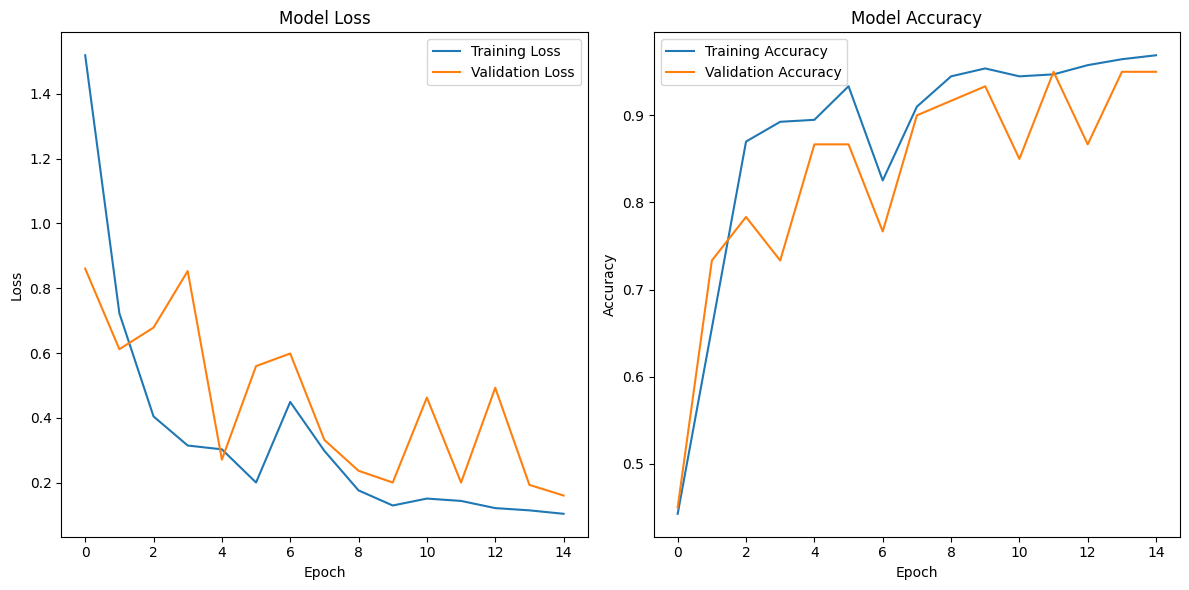

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save("drive/MyDrive/beagle.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##**TRAINING FINISHES HERE**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/beagle.h5")
model.summary()

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)/255
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
# Prepare image
img_path = "/content/archive/Test/Test/Powdery/83c12a8da497ef33.jpg"
img_size = (256, 256)
img_array = get_img_array(img_path, size=img_size)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, "conv2d_5")

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
def superimpose(img_array, heatmap, cam_path="cam.jpg", alpha=0.99):

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img_array.shape[1], img_array.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img_array
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    return superimposed_img

In [ ]:
from keras.preprocessing import image
img = cv2.imread('/content/archive/Train/Train/Rust/85806940f76d779e.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (256,256))

img_array = np.array(img_resized)
img_array = np.expand_dims(img_array, axis=0)/255

preds = np.array(model.predict(img_array))
heatmap = make_gradcam_heatmap(img_array, model, "conv2d_5")
plt.matshow(heatmap)
plt.show()
superimposed_img = superimpose(img, heatmap)

display(superimposed_img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
from PIL import Image
import numpy as np
import io
import base64

In [ ]:
import requests
model_filename = "model_v0_train.keras"
response = requests.get("https://raw.githubusercontent.com/Jensdboc/ISP/master/model_v0_train_20/model_v0_train.keras")

with open(model_filename, 'wb') as model_file:
    model_file.write(response.content)

model_predict = keras.models.load_model(model_filename)
model_predict.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
classes_predict = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)__Common_rust',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape__Esca(Black_Measles)',
 'Grape__Leaf_blight(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange__Haunglongbing(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,bell__Bacterial_spot',
 'Pepper,bell__healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
def superimpose(img_array, heatmap, cam_path="cam.jpg", alpha=0.5):

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img_array.shape[1], img_array.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    rgba = cv2.cvtColor(jet_heatmap, cv2.COLOR_RGB2RGBA)
    rgba[:, :, 3] = int(alpha * 255)

    return rgba

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Prediction:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      imgElement.style.top = '28px';
      imgElement.style.left = '10px';
      imgElement.style.width = '600px';
      imgElement.style.height = '450px';

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
import warnings

# Filter or ignore the specific warning
warnings.filterwarnings("ignore")

In [ ]:
import keras
from keras.preprocessing import image
from PIL import Image
import base64

target_size = (256,256)
video_stream()
prediction = ''
data = ''
while True:
    js_reply = video_frame(prediction + ' ' + str(max), data)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (256, 256))

    img_array = keras.utils.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)/255

    heatmap = make_gradcam_heatmap(img_array, model, "conv2d_5")
    superimposed_img = superimpose(np.array(img), heatmap)

    base64_encoded = base64.b64encode(cv2.imencode('.png', superimposed_img)[1]).decode("utf-8")

    data = 'data:image/png;base64,' + base64_encoded

    predictions = model_predict.predict(img_array, verbose=0)
    c = np.argmax(predictions, axis=1)
    max = np.max(predictions, axis=1)[0]
    prediction = classes_predict[int(c)]

<IPython.core.display.Javascript object>